<a href="https://colab.research.google.com/github/nitharshancv/Water_ML_JCOMP/blob/main/Water_Code_ML_JCOMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [32]:
df = pd.read_csv("/content/water1.csv")
df.head()

,fixed acidity,Trihalomethanes,Organic_carbon,Conductivity,Hardness,Chloramine,Solids,pH,Sulphate,Turbidity,Potability
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,6.00,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,6.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,6.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,6.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,6.51,0.56,9.4,0


In [33]:
df.isnull().any()

fixed acidity      False
Trihalomethanes    False
Organic_carbon     False
Conductivity       False
Hardness           False
Chloramine         False
Solids             False
pH                 False
Sulphate           False
Turbidity          False
Potability         False
dtype: bool

In [34]:
X_train, X_test,y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] ,random_state=104, test_size=0.20, shuffle=True)

In [35]:
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
      fixed acidity  Trihalomethanes  Organic_carbon  Conductivity  Hardness  \
5170            6.9             0.84            0.21           4.1     0.074   
6383            7.6             0.55            0.21           2.2     0.071   
6271            7.9             0.54            0.34           2.5     0.076   
1591            6.9             0.44            0.00           1.4     0.070   
1330            7.9             0.54            0.34           2.5     0.076   

      Chloramine  Solids    pH  Sulphate  Turbidity  
5170        16.0    65.0  6.53      0.72   9.233333  
6383         7.0    28.0  6.28      0.55   9.700000  
6271         8.0    17.0  6.20      0.72  13.100000  
1591        32.0    38.0  6.32      0.58  11.400000  
1330         8.0    17.0  6.20      0.72  13.100000  

X_test : 
      fixed acidity  Trihalomethanes  Organic_carbon  Conductivity  Hardness  \
1969            7.0            0.560            0.13           1.6     0.077   
375          

In [36]:
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Relu Activation Function

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

model = keras.Sequential(
    [
        keras.layers.Dense(units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros(),activation="relu", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="relu",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [38]:
print(initial_weights[1])
print(initial_weights[3])
print(initial_weights[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 0.01654149  0.01888904 -0.00453892 -0.00442597  0.00214659 -0.01431251
   0.00770402  0.00461725 -0.01152672]
 [ 0.00742838 -0.00050331  0.00819543 -0.00178055  0.02249721 -0.01730138
  -0.00777469 -0.00051097 -0.00647613]
 [ 0.01342484 -0.01178796 -0.01535353 -0.00572368 -0.00811793  0.00360273
   0.00827717 -0.00450538  0.01601524]
 [-0.00364084 -0.0064453   0.00138335 -0.02106539 -0.01027728  0.00806546
  -0.00301661  0.00590387  0.00114491]
 [-0.01230224  0.01021284  0.01382263 -0.00923338 -0.00213182 -0.00874902
   0.0141128  -0.00188093  0.02013636]
 [ 0.00213811 -0.0035526  -0.0148269  -0.00790759  0.00692713  0.00596344
  -0.02203766 -0.02247098 -0.00124977]
 [ 0.00968388 -0.00626018 -0.0007075  -0.00666842  0.00114509 -0.01126889
  -0.00836455 -0.00305487 -0.00091723]
 [-0.00063343 -0.0071583  -0.00112423 -0.00830439  0.01330695 -0.00165821
   0.00240305  0.00907907 -0.02583792]
 [ 0.02243705 -0.00322935 -0.01239388 

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 99        
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 199 (796.00 Byte)
Trainable params: 199 (796.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


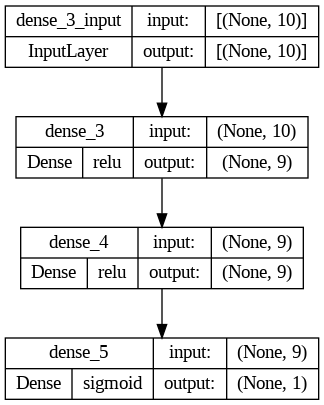

In [40]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,show_layer_activations=True)

In [41]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [42]:
history = model.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/500
65/65 [==============================] - 2s 7ms/step - loss: 0.6869 - auc: 0.5129 - val_loss: 0.6756 - val_auc: 0.7687
Epoch 2/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6651 - auc: 0.5702 - val_loss: 0.6389 - val_auc: 0.8750
Epoch 3/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6342 - auc: 0.8055 - val_loss: 0.6020 - val_auc: 0.8877
Epoch 4/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5974 - auc: 0.9005 - val_loss: 0.5577 - val_auc: 0.8887
Epoch 5/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5492 - auc: 0.9062 - val_loss: 0.5119 - val_auc: 0.8964
Epoch 6/500
65/65 [==============================] - 0s 4ms/step - loss: 0.5056 - auc: 0.9164 - val_loss: 0.4784 - val_auc: 0.9094
Epoch 7/500
65/65 [==============================] - 0s 4ms/step - loss: 0.4693 - auc: 0.9279 - val_loss: 0.4482 - val_auc: 0.9205
Epoch 8/500
65/65 [==============================] - 0s 5ms/step - loss: 0.4308 - a

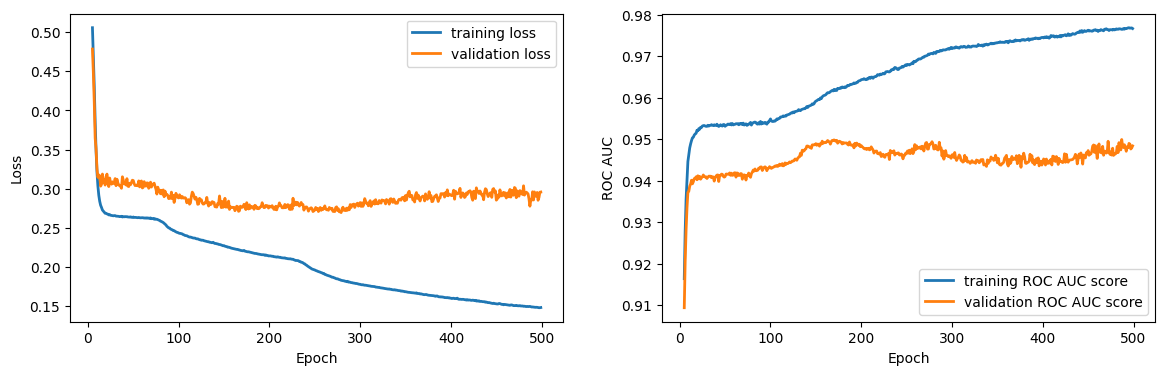

In [43]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [44]:
predicted = model.predict(np.concatenate((X_train,X_test),axis=0))
predicted = (predicted>0.5).astype(int)

254/254 [==============================] - 0s 1ms/step


In [45]:
t = np.concatenate((y_train,y_test),axis=0)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("accuracy: " + str(accuracy_score(t, predicted))+"\n")
print("precision: " + str(precision_score(t, predicted))+"\n")
print("recall score: " + str(recall_score(t, predicted))+"\n")
print("f1 score: " + str(f1_score(t, predicted))+"\n")


accuracy: 0.9486229467704088

precision: 0.9499527856468366

recall score: 0.9708550472881683

f1 score: 0.9602901870943108



# SIGMOID

In [47]:

model2 = keras.Sequential(
    [
        keras.layers.Dense(units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros(),activation="sigmoid", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="sigmoid",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights2 = model2.get_weights()

In [48]:
learning_rate = 0.001

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [49]:
history2 = model2.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/500
65/65 [==============================] - 1s 6ms/step - loss: 0.6679 - auc_1: 0.5018 - val_loss: 0.6462 - val_auc_1: 0.5000
Epoch 2/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6557 - auc_1: 0.5294 - val_loss: 0.6409 - val_auc_1: 0.5313
Epoch 3/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6545 - auc_1: 0.6820 - val_loss: 0.6396 - val_auc_1: 0.7509
Epoch 4/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6532 - auc_1: 0.7234 - val_loss: 0.6378 - val_auc_1: 0.8071
Epoch 5/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6517 - auc_1: 0.7021 - val_loss: 0.6365 - val_auc_1: 0.8245
Epoch 6/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6493 - auc_1: 0.8064 - val_loss: 0.6333 - val_auc_1: 0.8421
Epoch 7/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6463 - auc_1: 0.8506 - val_loss: 0.6295 - val_auc_1: 0.8542
Epoch 8/500
65/65 [==============================] - 0s

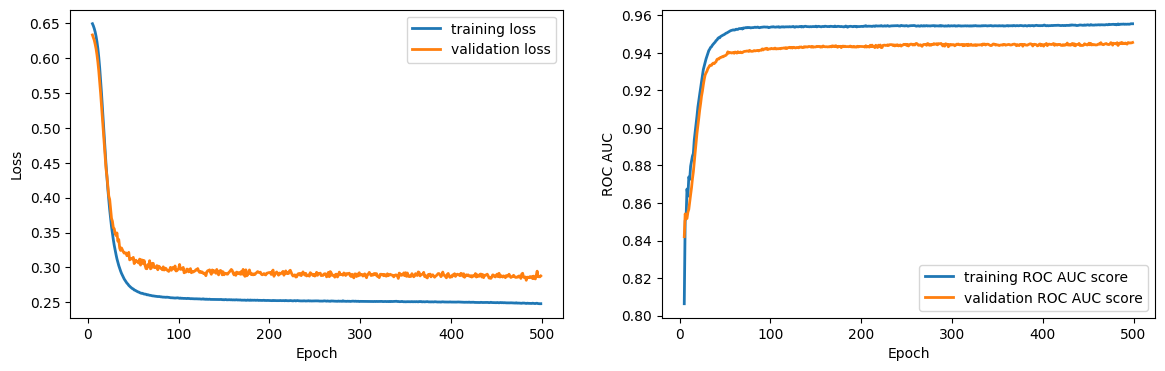

In [50]:
logs = pd.DataFrame(history2.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_1"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_1"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [51]:
predicted2 = model2.predict(np.concatenate((X_train,X_test),axis=0))
predicted2 = (predicted2>0.5).astype(int)

254/254 [==============================] - 0s 1ms/step


In [52]:
print("accuracy: " + str(accuracy_score(t, predicted2))+"\n")
print("precision: " + str(precision_score(t, predicted2))+"\n")
print("recall score: " + str(recall_score(t, predicted2))+"\n")
print("f1 score: " + str(f1_score(t, predicted2))+"\n")

accuracy: 0.9083611214029887

precision: 0.9242974574651118

recall score: 0.9332175255742134

f1 score: 0.9287360737610451



# tanh activation

In [53]:

model3 = keras.Sequential(
    [
        keras.layers.Dense(units=9,activation="tanh", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="tanh"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights3 = model3.get_weights()

In [54]:
learning_rate = 0.001

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [55]:
history3 = model3.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/500
65/65 [==============================] - 1s 6ms/step - loss: 0.6109 - auc_2: 0.7951 - val_loss: 0.5610 - val_auc_2: 0.9037
Epoch 2/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5323 - auc_2: 0.9043 - val_loss: 0.4843 - val_auc_2: 0.9013
Epoch 3/500
65/65 [==============================] - 0s 3ms/step - loss: 0.4511 - auc_2: 0.9147 - val_loss: 0.4193 - val_auc_2: 0.9117
Epoch 4/500
65/65 [==============================] - 0s 3ms/step - loss: 0.3865 - auc_2: 0.9268 - val_loss: 0.3803 - val_auc_2: 0.9250
Epoch 5/500
65/65 [==============================] - 0s 3ms/step - loss: 0.3400 - auc_2: 0.9370 - val_loss: 0.3422 - val_auc_2: 0.9344
Epoch 6/500
65/65 [==============================] - 0s 3ms/step - loss: 0.3092 - auc_2: 0.9445 - val_loss: 0.3201 - val_auc_2: 0.9377
Epoch 7/500
65/65 [==============================] - 0s 3ms/step - loss: 0.2892 - auc_2: 0.9488 - val_loss: 0.3161 - val_auc_2: 0.9395
Epoch 8/500
65/65 [==============================] - 0s

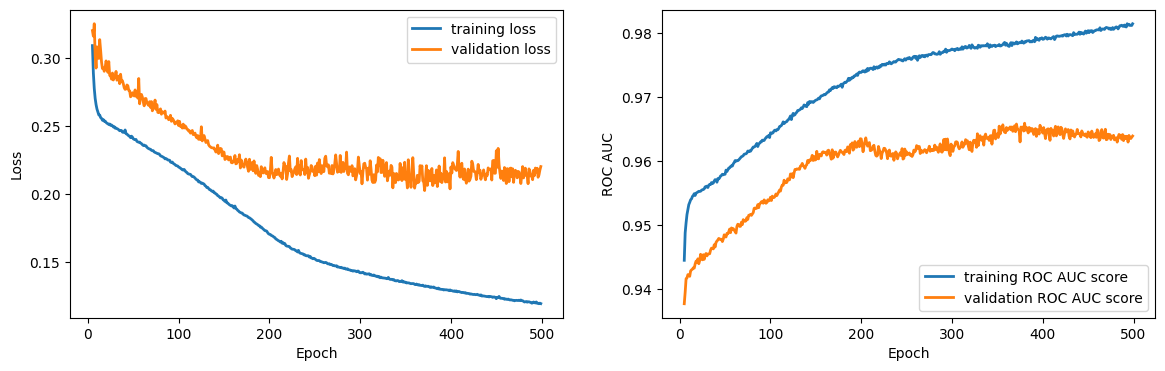

In [56]:
logs = pd.DataFrame(history3.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_2"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_2"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [57]:
predicted3 = model3.predict(np.concatenate((X_train,X_test),axis=0))
predicted3 = (predicted3>0.5).astype(int)

254/254 [==============================] - 0s 1ms/step


In [58]:
print("accuracy: " + str(accuracy_score(t, predicted3))+"\n")
print("precision: " + str(precision_score(t, predicted3))+"\n")
print("recall score: " + str(recall_score(t, predicted3))+"\n")
print("f1 score: " + str(f1_score(t, predicted3))+"\n")

accuracy: 0.9619612202050142

precision: 0.9563588687020042

recall score: 0.9855240301100173

f1 score: 0.970722433460076



# elu (exponential linear unit) activation

In [59]:

model4 = keras.Sequential(
    [
        keras.layers.Dense(units=9,activation="elu", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="elu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights4 = model4.get_weights()

In [60]:
learning_rate = 0.001

model4.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [61]:
history4 = model4.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/500
65/65 [==============================] - 1s 6ms/step - loss: 0.6308 - auc_3: 0.6752 - val_loss: 0.5907 - val_auc_3: 0.7679
Epoch 2/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5690 - auc_3: 0.8279 - val_loss: 0.5304 - val_auc_3: 0.8458
Epoch 3/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5012 - auc_3: 0.8751 - val_loss: 0.4645 - val_auc_3: 0.8837
Epoch 4/500
65/65 [==============================] - 0s 3ms/step - loss: 0.4334 - auc_3: 0.9055 - val_loss: 0.4069 - val_auc_3: 0.9105
Epoch 5/500
65/65 [==============================] - 0s 3ms/step - loss: 0.3767 - auc_3: 0.9265 - val_loss: 0.3665 - val_auc_3: 0.9277
Epoch 6/500
65/65 [==============================] - 0s 3ms/step - loss: 0.3345 - auc_3: 0.9388 - val_loss: 0.3416 - val_auc_3: 0.9362
Epoch 7/500
65/65 [==============================] - 0s 4ms/step - loss: 0.3060 - auc_3: 0.9464 - val_loss: 0.3290 - val_auc_3: 0.9387
Epoch 8/500
65/65 [==============================] - 0s

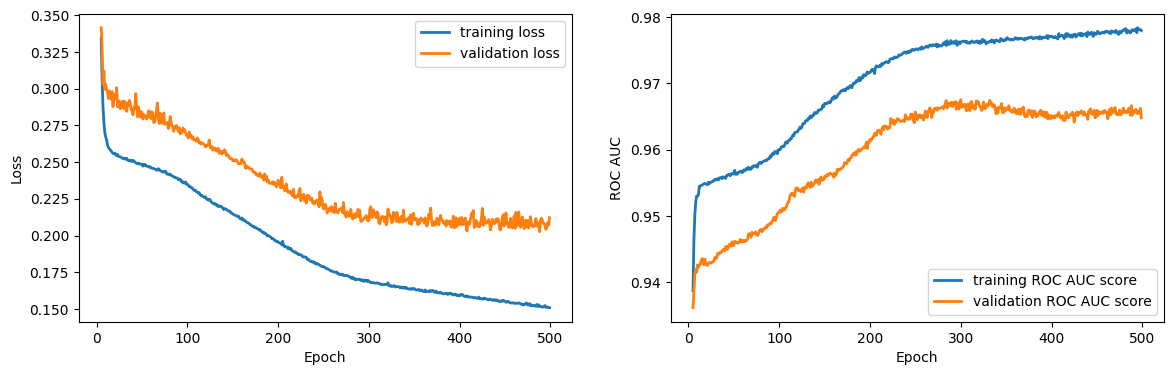

In [62]:
logs = pd.DataFrame(history4.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_3"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_3"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [63]:
predicted4 = model4.predict(np.concatenate((X_train,X_test),axis=0))
predicted4 = (predicted4>0.5).astype(int)

254/254 [==============================] - 0s 1ms/step


In [64]:
print("accuracy: " + str(accuracy_score(t, predicted4))+"\n")
print("precision: " + str(precision_score(t, predicted4))+"\n")
print("recall score: " + str(recall_score(t, predicted4))+"\n")
print("f1 score: " + str(f1_score(t, predicted4))+"\n")

accuracy: 0.963443250586637

precision: 0.9602411908799698

recall score: 0.983593900791353

f1 score: 0.9717772692601067



# best performing activation function with dropout

In [65]:
final_model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="tanh", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="tanh"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights_final = final_model.get_weights()

In [66]:
learning_rate = 0.001

final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [67]:
history_final = final_model.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/500
65/65 [==============================] - 2s 9ms/step - loss: 0.6832 - auc_4: 0.4375 - val_loss: 0.6197 - val_auc_4: 0.7528
Epoch 2/500
65/65 [==============================] - 0s 5ms/step - loss: 0.6060 - auc_4: 0.7642 - val_loss: 0.5521 - val_auc_4: 0.8488
Epoch 3/500
65/65 [==============================] - 0s 4ms/step - loss: 0.5378 - auc_4: 0.8503 - val_loss: 0.4903 - val_auc_4: 0.8704
Epoch 4/500
65/65 [==============================] - 0s 4ms/step - loss: 0.4754 - auc_4: 0.8794 - val_loss: 0.4460 - val_auc_4: 0.8930
Epoch 5/500
65/65 [==============================] - 0s 4ms/step - loss: 0.4215 - auc_4: 0.9034 - val_loss: 0.4080 - val_auc_4: 0.9085
Epoch 6/500
65/65 [==============================] - 0s 4ms/step - loss: 0.3834 - auc_4: 0.9153 - val_loss: 0.3785 - val_auc_4: 0.9196
Epoch 7/500
65/65 [==============================] - 0s 4ms/step - loss: 0.3534 - auc_4: 0.9261 - val_loss: 0.3694 - val_auc_4: 0.9262
Epoch 8/500
65/65 [==============================] - 0s

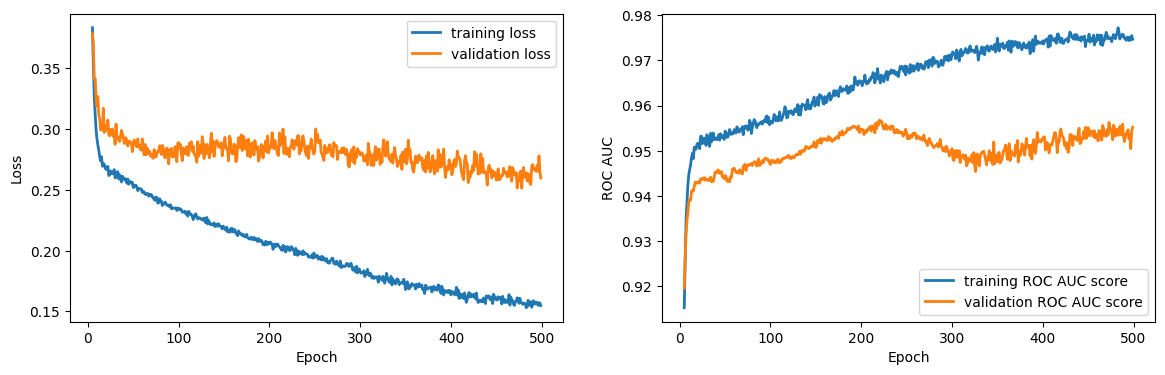

In [68]:
logs = pd.DataFrame(history_final.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_4"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_4"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [69]:
predicted_final = final_model.predict(np.concatenate((X_train,X_test),axis=0))
predicted_final = (predicted4>0.5).astype(int)

254/254 [==============================] - 0s 1ms/step


In [70]:
print("accuracy: " + str(accuracy_score(t, predicted_final))+"\n")
print("precision: " + str(precision_score(t, predicted_final))+"\n")
print("recall score: " + str(recall_score(t, predicted_final))+"\n")
print("f1 score: " + str(f1_score(t, predicted_final))+"\n")

accuracy: 0.963443250586637

precision: 0.9602411908799698

recall score: 0.983593900791353

f1 score: 0.9717772692601067



> looks like a dropout layer didnt have an effect on the metrics

# RMS Prop instead of Adam

In [71]:
final_model.compile(optimizer  =tf.keras.optimizers.RMSprop(learning_rate=0.01),
                    loss="binary_crossentropy",
              metrics=keras.metrics.AUC())

In [72]:
history_final_rms = final_model.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/500
65/65 [==============================] - 2s 10ms/step - loss: 0.2027 - auc_5: 0.9659 - val_loss: 0.3008 - val_auc_5: 0.9425
Epoch 2/500
65/65 [==============================] - 0s 4ms/step - loss: 0.1767 - auc_5: 0.9736 - val_loss: 0.2670 - val_auc_5: 0.9539
Epoch 3/500
65/65 [==============================] - 0s 4ms/step - loss: 0.1851 - auc_5: 0.9705 - val_loss: 0.2327 - val_auc_5: 0.9612
Epoch 4/500
65/65 [==============================] - 0s 4ms/step - loss: 0.1807 - auc_5: 0.9717 - val_loss: 0.2342 - val_auc_5: 0.9587
Epoch 5/500
65/65 [==============================] - 0s 4ms/step - loss: 0.1837 - auc_5: 0.9708 - val_loss: 0.2361 - val_auc_5: 0.9589
Epoch 6/500
65/65 [==============================] - 0s 4ms/step - loss: 0.1837 - auc_5: 0.9715 - val_loss: 0.2187 - val_auc_5: 0.9649
Epoch 7/500
65/65 [==============================] - 0s 4ms/step - loss: 0.1818 - auc_5: 0.9718 - val_loss: 0.2518 - val_auc_5: 0.9578
Epoch 8/500
65/65 [==============================] - 0

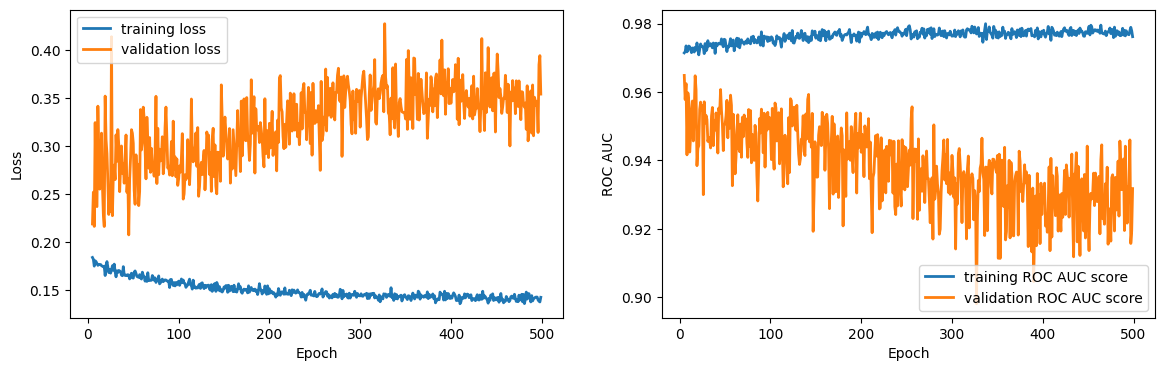

In [73]:
logs = pd.DataFrame(history_final_rms.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_5"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_5"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [74]:
predicted_final_rms = final_model.predict(np.concatenate((X_train,X_test),axis=0))
predicted_final_rms = (predicted4>0.5).astype(int)

254/254 [==============================] - 0s 1ms/step


In [75]:
print("accuracy: " + str(accuracy_score(t, predicted_final_rms))+"\n")
print("precision: " + str(precision_score(t, predicted_final_rms))+"\n")
print("recall score: " + str(recall_score(t, predicted_final_rms))+"\n")
print("f1 score: " + str(f1_score(t, predicted_final_rms))+"\n")

accuracy: 0.963443250586637

precision: 0.9602411908799698

recall score: 0.983593900791353

f1 score: 0.9717772692601067



> no change

# ML ALGORITHMS

> LOGISTIC REGRESSION

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, y_pred))+"\n")
print("precision: " + str(precision_score(y_test, y_pred))+"\n")
print("recall score: " + str(recall_score(y_test, y_pred))+"\n")
print("f1 score: " + str(f1_score(y_test, y_pred))+"\n")

accuracy: 0.9061728395061729

precision: 0.901840490797546

recall score: 0.9625818521983162

f1 score: 0.9312217194570136



> KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, y_pred))+"\n")
print("precision: " + str(precision_score(y_test, y_pred))+"\n")
print("recall score: " + str(recall_score(y_test, y_pred))+"\n")
print("f1 score: " + str(f1_score(y_test, y_pred))+"\n")

accuracy: 0.9493827160493827

precision: 0.9548387096774194

recall score: 0.9691300280636108

f1 score: 0.9619312906220984



> Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, y_pred))+"\n")
print("precision: " + str(precision_score(y_test, y_pred))+"\n")
print("recall score: " + str(recall_score(y_test, y_pred))+"\n")
print("f1 score: " + str(f1_score(y_test, y_pred))+"\n")

accuracy: 0.8561728395061728

precision: 0.8512605042016806

recall score: 0.9476145930776426

f1 score: 0.8968570163789287



> CART


In [79]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, y_pred))+"\n")
print("precision: " + str(precision_score(y_test, y_pred))+"\n")
print("recall score: " + str(recall_score(y_test, y_pred))+"\n")
print("f1 score: " + str(f1_score(y_test, y_pred))+"\n")

accuracy: 0.7179012345679012

precision: 0.8333333333333334

recall score: 0.715622076707203

f1 score: 0.7700050327126321



>LDA

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, y_pred))+"\n")
print("precision: " + str(precision_score(y_test, y_pred))+"\n")
print("recall score: " + str(recall_score(y_test, y_pred))+"\n")
print("f1 score: " + str(f1_score(y_test, y_pred))+"\n")

accuracy: 0.9080246913580247

precision: 0.9283054003724395

recall score: 0.9326473339569691

f1 score: 0.9304713019132057



Weighted Ensemble

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor


df = pd.read_csv('water1.csv')

X = df[['fixed acidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Hardness', 'Chloramine', 'Solids', 'pH', 'Sulphate', 'Turbidity']]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  individual regression models
logreg_model = LogisticRegression()
svr_model = SVR()
rf_model = RandomForestRegressor()

logreg_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# predictions on the validation set
logreg_preds = logreg_model.predict(X_test_scaled)
svr_preds = svr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the performance of individual models
logreg_accuracy = accuracy_score(y_test, (logreg_preds > 0.5).astype(int))
svr_mse = mean_squared_error(y_test, svr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

#  weights based on performance (inverse of MSE for regression)
logreg_weight = 1 / logreg_accuracy
svr_weight = 1 / svr_mse
rf_weight = 1 / rf_mse

#  weights
total_weight = logreg_weight + svr_weight + rf_weight
logreg_weight /= total_weight
svr_weight /= total_weight
rf_weight /= total_weight

#  predictions using weighted sum
ensemble_preds = logreg_weight * logreg_preds + svr_weight * svr_preds + rf_weight * rf_preds

#  continuous predictions to binary (0 or 1) using a threshold
threshold = 0.5
ensemble_binary_preds = (ensemble_preds > threshold).astype(int)

# accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_binary_preds)

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"SVR MSE: {svr_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Logistic Regression Accuracy: 0.8851851851851852
SVR MSE: 0.03710720605010559
Random Forest MSE: 0.025193703703703704
Ensemble Accuracy: 0.9685185185185186


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor


df = pd.read_csv('water1.csv')

X = df[['fixed acidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Hardness', 'Chloramine', 'Solids', 'pH', 'Sulphate', 'Turbidity']]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  individual regression models
logreg_model = LogisticRegression()
svr_model = SVR()
rf_model = RandomForestRegressor()

logreg_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# predictions on the validation set
logreg_preds = logreg_model.predict(X_test_scaled)
svr_preds = svr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the performance of individual models
logreg_accuracy = accuracy_score(y_test, (logreg_preds > 0.5).astype(int))
svr_mse = mean_squared_error(y_test, svr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

#  weights based on performance (inverse of MSE for regression)
logreg_weight = 1 / logreg_accuracy
svr_weight = 1 / svr_mse
rf_weight = 1 / rf_mse

#  weights
total_weight = logreg_weight + svr_weight + rf_weight
logreg_weight /= total_weight
svr_weight /= total_weight
rf_weight /= total_weight

#  predictions using weighted sum
ensemble_preds = logreg_weight * logreg_preds + svr_weight * svr_preds + rf_weight * rf_preds

#  continuous predictions to binary (0 or 1) using a threshold
threshold = 0.5
ensemble_binary_preds = (ensemble_preds > threshold).astype(int)

# accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_binary_preds)

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"SVR MSE: {svr_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Ensemble Accuracy: {ensemble_accuracy}")

import numpy as np

# ... (your existing code)

# Create a grid of threshold values
thresholds = np.arange(0.1, 1.0, 0.1)

# Variables to store the best threshold and accuracy
best_threshold = 0.5
best_accuracy = 0.0

# Perform grid search to find the best threshold
for threshold in thresholds:
    # Convert continuous predictions to binary using the current threshold
    current_binary_preds = (ensemble_preds > threshold).astype(int)

    # Calculate accuracy with the current threshold
    current_accuracy = accuracy_score(y_test, current_binary_preds)

    # Update the best threshold if the current accuracy is higher
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

# Print the best threshold and accuracy
print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")

# Use the best threshold to convert predictions to binary
final_ensemble_binary_preds = (ensemble_preds > best_threshold).astype(int)

# Calculate the accuracy of the ensemble model with the best threshold
final_ensemble_accuracy = accuracy_score(y_test, final_ensemble_binary_preds)
print(f"Final Ensemble Accuracy with Best Threshold: {final_ensemble_accuracy}")


Logistic Regression Accuracy: 0.8851851851851852
SVR MSE: 0.03710720605010559
Random Forest MSE: 0.025377962962962967
Ensemble Accuracy: 0.9666666666666667
Best Threshold: 0.6
Best Accuracy: 0.9685185185185186
Final Ensemble Accuracy with Best Threshold: 0.9685185185185186


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor


df = pd.read_csv('water1.csv')

X = df[['fixed acidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Hardness', 'Chloramine', 'Solids', 'pH', 'Sulphate', 'Turbidity']]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  individual regression models
logreg_model = LogisticRegression()
svr_model = SVR()
rf_model = RandomForestRegressor()

logreg_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# predictions on the validation set
logreg_preds = logreg_model.predict(X_test_scaled)
svr_preds = svr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the performance of individual models
logreg_accuracy = accuracy_score(y_test, (logreg_preds > 0.5).astype(int))
svr_mse = mean_squared_error(y_test, svr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

#  weights based on performance (inverse of MSE for regression)
logreg_weight = 1 / logreg_accuracy
svr_weight = 1 / svr_mse
rf_weight = 1 / rf_mse

#  weights
total_weight = logreg_weight + svr_weight + rf_weight
logreg_weight /= total_weight
svr_weight /= total_weight
rf_weight /= total_weight

#  predictions using weighted sum
ensemble_preds = logreg_weight * logreg_preds + svr_weight * svr_preds + rf_weight * rf_preds

#  continuous predictions to binary (0 or 1) using a threshold
threshold = 0.300000000000004
ensemble_binary_preds = (ensemble_preds > threshold).astype(int)

# accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_binary_preds)

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"SVR MSE: {svr_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Logistic Regression Accuracy: 0.8851851851851852
SVR MSE: 0.03710720605010559
Random Forest MSE: 0.02502648148148148
Ensemble Accuracy: 0.9623456790123457


In [84]:
#how each weight is calc
# Provided metrics
accuracy_logreg = 0.7685589519650655
mse_svr = 0.14523105341780382
mse_rf = 0.1455768558951965

# Calculate weights
weight_logreg = accuracy_logreg
weight_svr = 1 / mse_svr
weight_rf = 1 / mse_rf

# Normalize weights
total_weight = weight_logreg + weight_svr + weight_rf
normalized_weight_logreg = weight_logreg / total_weight
normalized_weight_svr = weight_svr / total_weight
normalized_weight_rf = weight_rf / total_weight

# Display the results
print(f"Weight for Logistic Regression: {normalized_weight_logreg}")
print(f"Weight for SVR: {normalized_weight_svr}")
print(f"Weight for Random Forest: {normalized_weight_rf}")


Weight for Logistic Regression: 0.05291880259940635
Weight for SVR: 0.4741036903732964
Weight for Random Forest: 0.4729775070272972


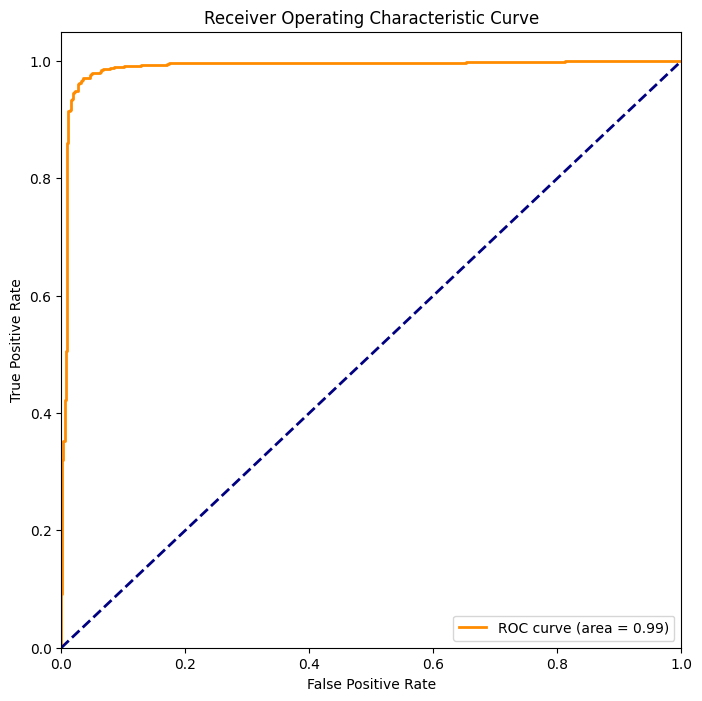

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler  # Add this line
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('water1.csv')

# Define features (X) and target variable (y)
X = df[['fixed acidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Hardness', 'Chloramine', 'Solids', 'pH', 'Sulphate', 'Turbidity']]
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train individual regression models
logreg_model = LogisticRegression()
svr_model = SVR()
rf_model = RandomForestRegressor()

logreg_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
logreg_preds = logreg_model.predict(X_test_scaled)
svr_preds = svr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Assign weights based on performance (inverse of MSE for regression)
logreg_weight = 1 / accuracy_score(y_test, (logreg_preds > 0.5).astype(int))
svr_weight = 1 / mean_squared_error(y_test, svr_preds)
rf_weight = 1 / mean_squared_error(y_test, rf_preds)

# Normalize weights
total_weight = logreg_weight + svr_weight + rf_weight
normalized_weight_logreg = logreg_weight / total_weight
normalized_weight_svr = svr_weight / total_weight
normalized_weight_rf = rf_weight / total_weight

# Combine predictions using weighted sum
ensemble_preds = (
    normalized_weight_logreg * logreg_preds +
    normalized_weight_svr * svr_preds +
    normalized_weight_rf * rf_preds
)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


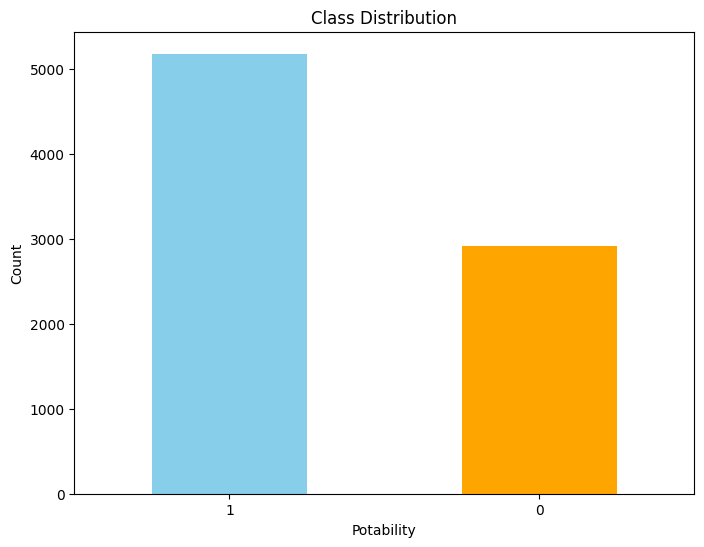

Logistic Regression Accuracy: 0.8851851851851852
SVR MSE: 0.03710720605010559
Random Forest MSE: 0.025336913580246912
Ensemble Accuracy: 0.9685185185185186


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor

# Load your dataset
df = pd.read_csv('water1.csv')

X = df[['fixed acidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Hardness', 'Chloramine', 'Solids', 'pH', 'Sulphate', 'Turbidity']]
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  individual regression models
logreg_model = LogisticRegression()
svr_model = SVR()
rf_model = RandomForestRegressor()

logreg_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# predictions on the validation set
logreg_preds = logreg_model.predict(X_test_scaled)
svr_preds = svr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the performance of individual models
logreg_accuracy = accuracy_score(y_test, (logreg_preds > 0.5).astype(int))
svr_mse = mean_squared_error(y_test, svr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

#  weights based on performance (inverse of MSE for regression)
logreg_weight = 1 / logreg_accuracy
svr_weight = 1 / svr_mse
rf_weight = 1 / rf_mse

#  weights
total_weight = logreg_weight + svr_weight + rf_weight
logreg_weight /= total_weight
svr_weight /= total_weight
rf_weight /= total_weight

#  predictions using weighted sum
ensemble_preds = logreg_weight * logreg_preds + svr_weight * svr_preds + rf_weight * rf_preds

#  continuous predictions to binary (0 or 1) using a threshold
threshold = 0.5
ensemble_binary_preds = (ensemble_preds > threshold).astype(int)

# Accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_binary_preds)

# Find class distribution
class_distribution = y.value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"SVR MSE: {svr_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Ensemble Accuracy: {ensemble_accuracy}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


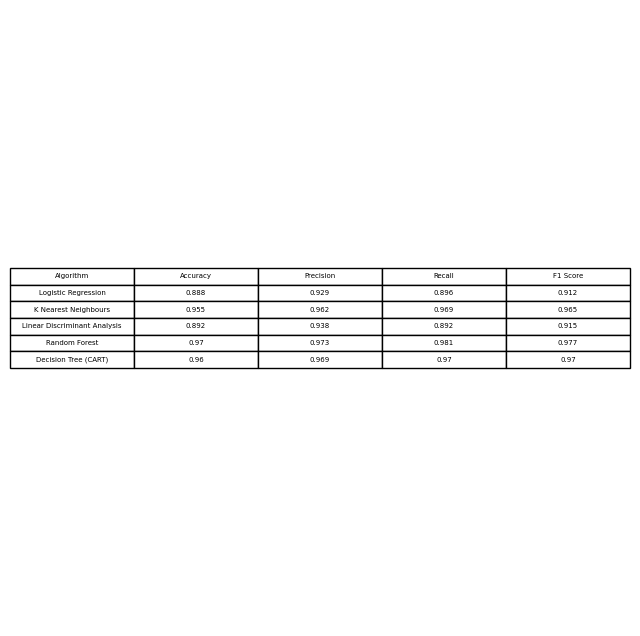

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
df = pd.read_csv('water1.csv')

# Define features (X) and target variable (y)
X = df[['fixed acidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Hardness', 'Chloramine', 'Solids', 'pH', 'Sulphate', 'Turbidity']]
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbours': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree (CART)': DecisionTreeClassifier()
}

# Initialize lists to store evaluation metrics
results = {'Algorithm': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results['Algorithm'].append(name)
    results['Accuracy'].append(round(accuracy, 3))
    results['Precision'].append(round(precision, 3))
    results['Recall'].append(round(recall, 3))
    results['F1 Score'].append(round(f1, 3))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results DataFrame to a CSV file
results_df.to_csv('classification_results.csv', index=False)

# Plot and save the table as a PNG file with a more square aspect ratio
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.savefig('classification_results_table.png', bbox_inches='tight', pad_inches=0.2)
plt.show()
